In [4]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Generate random data
np.random.seed(42)
torch.manual_seed(42)
X = np.random.rand(100, 1)
y = 3 * X + 2 + np.random.randn(100, 1) * 0.1

In [6]:
# Convert data to tensors
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float()

In [7]:
# Define the linear regression model
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

In [8]:
# Instantiate the model
model = LinearRegression(1, 1)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [9]:
num_epochs = 100
losses = []
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    losses.append(loss.item())

Epoch [10/100], Loss: 3.4647
Epoch [20/100], Loss: 2.1524
Epoch [30/100], Loss: 1.3561
Epoch [40/100], Loss: 0.8724
Epoch [50/100], Loss: 0.5781
Epoch [60/100], Loss: 0.3986
Epoch [70/100], Loss: 0.2886
Epoch [80/100], Loss: 0.2207
Epoch [90/100], Loss: 0.1784
Epoch [100/100], Loss: 0.1516


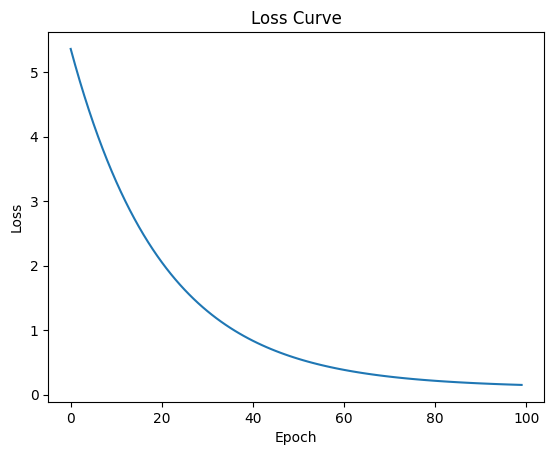

In [10]:
# Plot the loss curve
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

In [11]:
# Get the predicted values
predicted = model(X).detach().numpy()

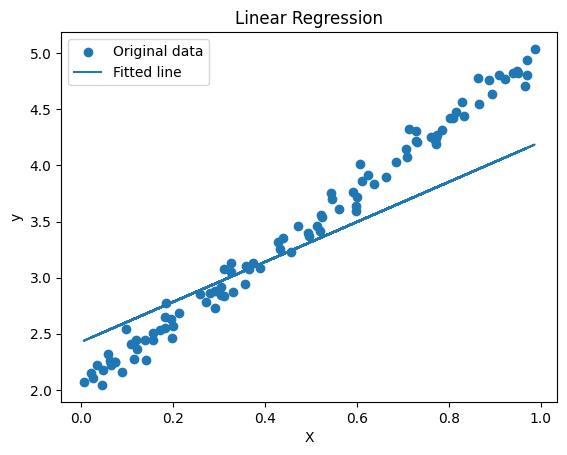

In [12]:
# Plot the original data and the predicted values
plt.scatter(X.numpy(), y.numpy(), label='Original data')
plt.plot(X.numpy(), predicted, label='Fitted line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()